
Part 1:  Complete this tutorial (Steps 1-10) and then use what you learn to create your own case study.
The data set is available in Weekly Resources/Data

Case Study:  Analyze data to predict who will Survive the Titanic
 
1.	Load the data from the “train.csv” file into a DataFrame.
2.	Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
3.	Display the first 5 rows of data so you can see the column headings and the type of data for each column.
a.	Notice that Survived is represented as a 1 or 0
b.	Notice that missing data is represented as “NaN”
c.	The Survived variable will be the “target” and the other variables will be the “features”
4.	Think about some questions that might help you predict who will survive:
a.	What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
b.	Are the numerical variables correlated?
c.	Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?
d.	Are there different survival rates in different categories? For example, did more women survived than man?
5.	Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  Does this present any more questions for you?  Does it lead you to a conclusion yet?  
6.	Make some histograms of your data (“A picture is worth a thousand words!”)
a.	Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. A large amount of the tickets sold were less than $50. There are very few tickets sold where the fare was over $500.
7.	Make some bar charts for variables with only a few options.
a.	Ticket and Cabin have more than 100 variables so don’t do those!
8.	To see if the data is correlated, make some Pearson Ranking charts
a.	Notice that in my sample code, I have saved this png file.
b.	The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  These results show there is “some” positive correlation but it’s not a high correlation.
9.	 Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
a.	 That’s a cool chart, isn’t it?!  Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.  
10.	Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
a.	More females survived than men.  3rd Class Tickets had a lower survival rate.  Also, Embarkation from Southampton port had a lower survival rate.

In [3]:
# Titanic Tutorial Part 1 
## Graphics Analysis

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import yellowbrick

In [4]:
output_width = 1000
#output_width = 80 #//*** Normal Output width
pd.set_option("display.width", output_width)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:

#Step 1: Load data into a dataframe 
filename = "~/Documents/mygithub/bu_dsc/data/raw/train.csv"

data = pd.read_csv(filename)

In [6]:
# Step 2: Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (891, 12)


In [7]:
# #Step 3: Look at the data 
# Observations:
#   a. Notice that Survived is represented as a 1 or 0 
#   b. Notice that missing data is represented as “NaN” 
#   c. The Survived variable will be the “target” and the other variables will be the “features”

print(data.head(5))

   PassengerId  Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                              Braund, Mr. Owen Harris    male  22.0      1      0         A/5 21171   7.2500   NaN        S
1            2         1       1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0          PC 17599  71.2833   C85        C
2            3         1       3                               Heikkinen, Miss. Laina  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S
3            4         1       1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0            113803  53.1000  C123        S
4            5         0       3                             Allen, Mr. William Henry    male  35.0      0      0            373450   8.0500   NaN        S


Step 4
Some questions that might help you predict who will survive: 
    a. What do the variables look like? 
        For example, are they numerical or categorical data. 
            If they are numerical, what are their distribution; 
            if they are categorical, how many are they in different categories? 
    b. Are the numerical variables correlated? 
    c. Are the distributions of numerical variables the same or different among survived and not survived? 
    d. Is the survival rate different for different values? For example, were people more likely to survive if they were younger? 
    e. Are there different survival rates in different categories? For example, did more women survived than man?
Add a few more if possible


In [8]:
#Step 5: what type of variables are in the table 
# Look at summary information about your data (total, mean, min, max, freq, unique, etc.) 
# Does this present any more questions for you? 
# Does it lead you to a conclusion yet?

print("Describe Data") 
print(data.describe()) 
print("Summarized Data") 
print(data.describe(include='O'))

Describe Data
       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
Summarized Data
                       Name   Sex    Ticket    Cabin Embarked
count                   891   891       891      204      889
unique                  891

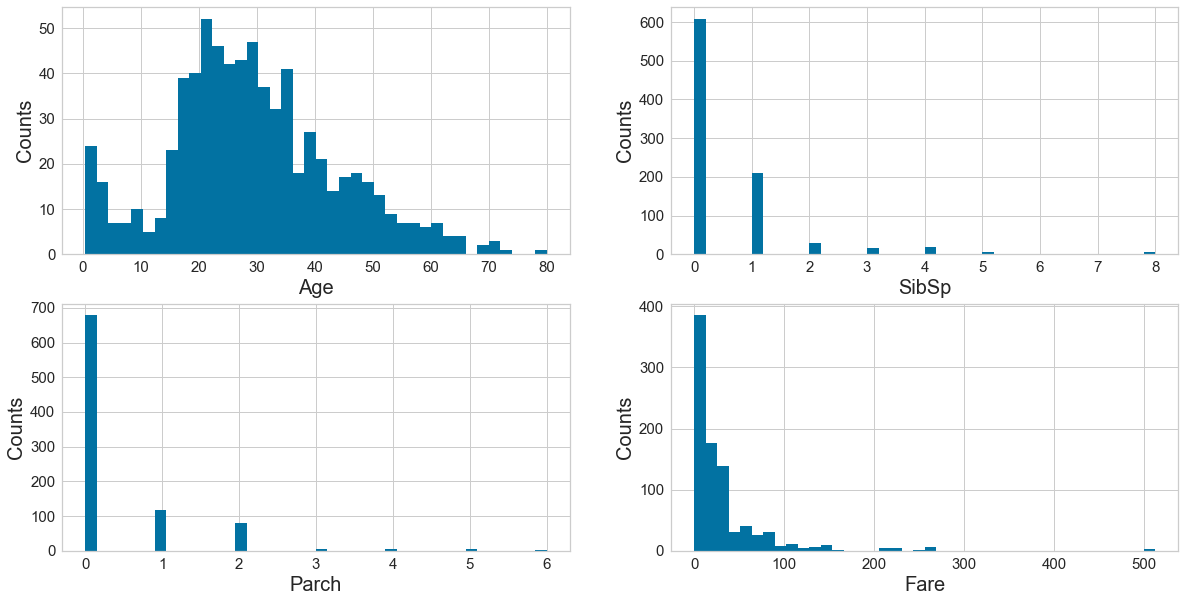

In [50]:
# Step 6: Make some histograms of your data
# Set up the figure size first
plt.rcParams['figure.figsize'] = (20, 10)

# Make sub plots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the numeric features 
num_features = ['Age', 'SibSp', 'Parch', 'Fare'] 
xaxes = num_features 
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# Draw histograms
axes = axes.ravel() 
for idx, ax in enumerate(axes): 
    ax.hist(data[num_features[idx]].dropna(), bins=40) 
    ax.set_xlabel(xaxes[idx], fontsize=20) 
    ax.set_ylabel(yaxes[idx], fontsize=20) 
    ax.tick_params(axis='both', labelsize=15) 

plt.show()

In [17]:
# a. Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. 
# A large amount of the tickets sold were less than 50.

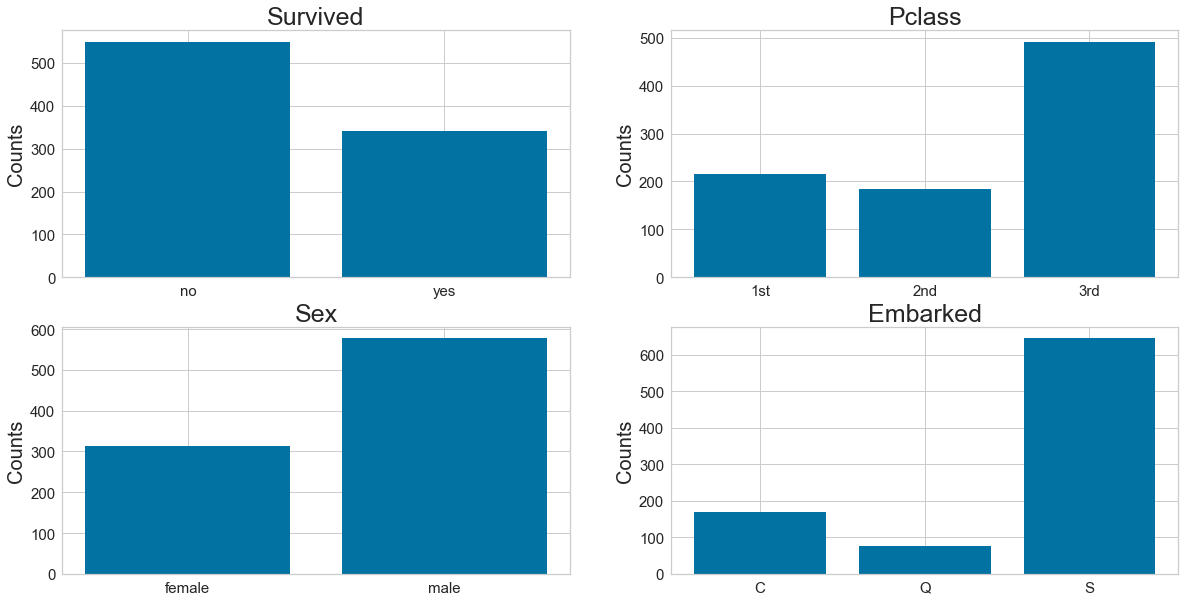

In [46]:
# Step 7: Make some bar charts for variables with only a few options. 
# a. Ticket and Cabin have more than 100 variables so don’t do those!

# Barcharts: set up the figure size 
%matplotlib inline 

plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots

fig, axes = plt.subplots(nrows = 2, ncols = 2)

# In the X axis we are showing survived: 'yes if 1' else perished 'no = 0'
# The Y axis shows the corresponding counts 

X_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived'] 
Y_Survived = data.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']

axes[0,0].bar(X_Survived, Y_Survived) 
axes[0,0].set_title('Survived', fontsize=25) 
axes[0,0].set_ylabel('Counts', fontsize=20) 
axes[0,0].tick_params(axis='both', labelsize=15)

X_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = data.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[0,1].bar(X_Pclass, Y_Pclass) 
axes[0,1].set_title('Pclass', fontsize=25) 
axes[0,1].set_ylabel('Counts', fontsize=20) 
axes[0,1].tick_params(axis='both', labelsize=15)

X_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = data.groupby('Sex').size().reset_index(name='Counts')['Counts']

# Make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex) 
axes[1, 0].set_title('Sex', fontsize=25) 
axes[1, 0].set_ylabel('Counts', fontsize=20) 
axes[1, 0].tick_params(axis='both', labelsize=15)

X_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = data.groupby('Embarked').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)



<AxesSubplot:title={'center':'Pearson Ranking of 4 Features'}>

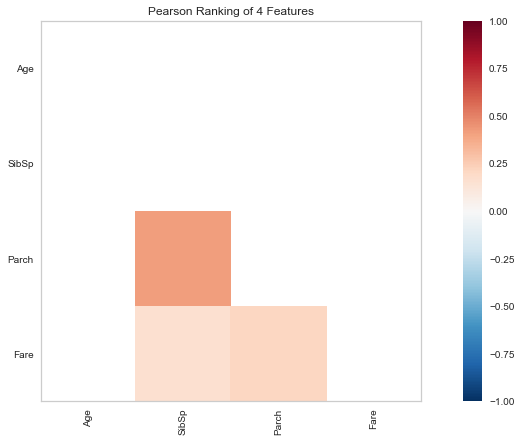

In [56]:
# Step 8
# To see if the data is correlated, make some Pearson Ranking charts
#  a. Notice that in my sample code, I have saved this png file.
#  b. The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation) 
# These results show there is “some” positive correlation but it’s not a high correlation.

#set up the figure size
# %matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof(outpath="/home/arindam/Documents/mygithub/bu_dsc/reports/figures/pcoords1.png") # Draw/show/poof the data
# plt.show()


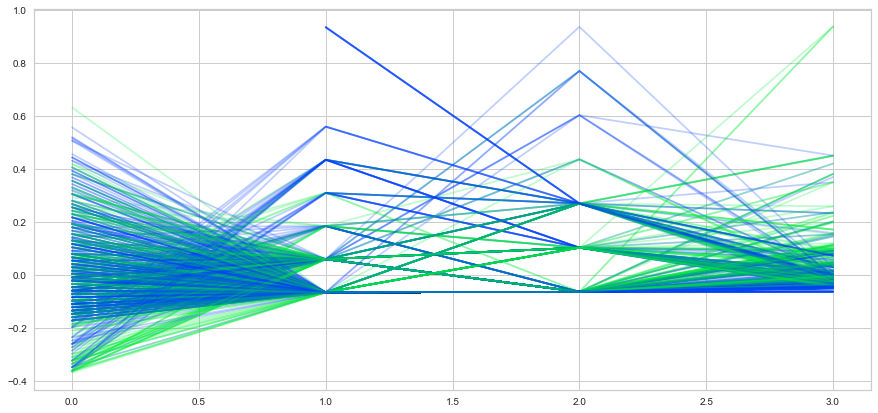

In [57]:
# Step 9:  Compare variables against Survived and Not Survived
# Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that 
# survived and those that did not survive. 
#   a.  That’s a cool chart, isn’t it?! Passengers traveling with siblings on the boat have a higher death rate and passengers who paid a higher fare had a higher survival rate.

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

# copy data to a new dataframe
data_norm = data.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = data.Survived.values

# Instantiate the visualizer

visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();


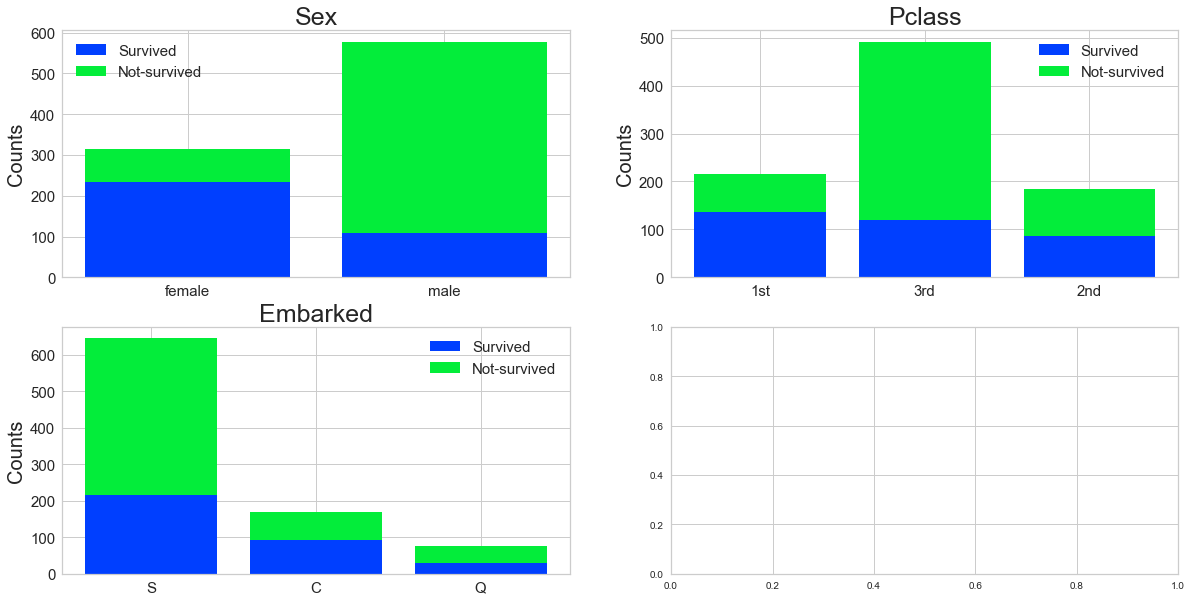

In [58]:
# Step 10 - stacked bar charts to compare survived/not survived
# Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
#  a. More females survived than men.
#  3rd Class Tickets had a lower survival rate. Also, Embarkation from Southampton port had a lower survival rate.

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
Sex_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Sex'].value_counts()
Sex_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[data['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = data.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[data['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
#plt.show()


In [1]:
# 11.	Some of my questions have been answered by seeing the charts but in some ways, looking at this much data has created even more questions.  
    # a.	Now it’s time to reduce some of the features so we can concentrate on the things that matter!  There features we will get rid of are:  "PassengerId", "Name", "Ticket" and "Cabin".  (ID doesn’t really give us any useful data, Ticket and Cabin have too many variables.  Name might reflect that they are related but we’re keeping the category about siblings (for now).  
    # b.	We can also fill in missing values.  (Cabin has some missing values but we are dropping that feature.)  Age has some missing values so I’ll fill in with the average age.  Embarked also has some missing so I’ll the most common.  
# 12.	If you go back and look at the histograms of Fare, you’ll see that it is very skewed…many low cost fares, not very many high cost fares.  Log Transformation is a good method to use on highly skewed data.  
# 13.	 Convert your categorical data into numbers (Sex, PClass, Embark)

In [2]:
#Titanic Tutorial Part 2
#Graphics Analysis
#Feature Reduction (Extraction/Selection)
#Filling in Missing Values

In [9]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

fill_na_median(data['Age'])

# check the result
print(data['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [10]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

# check the result
print(data['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [12]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)

data['Fare_log1p'] = log_transformation(data['Fare'])
# check the data
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare  Fare_log1p
count   891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642   29.361582    0.523008    0.381594   32.204208    2.962246
std     257.353842    0.486592    0.836071   13.019697    1.102743    0.806057   49.693429    0.969048
min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000   22.000000    0.000000    0.000000    7.910400    2.187218
50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200    2.737881
75%     668.500000    1.000000    3.000000   35.000000    1.000000    0.000000   31.000000    3.465736
max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200    6.240917


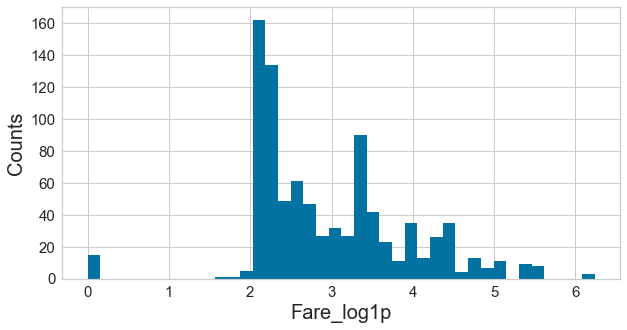

In [13]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [14]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0           0           1           0         1           0           0           1
1           1           0           0           1         0           1           0           0
2           0           0           1           1         0           0           0           1
3           1           0           0           1         0           0           0           1
4           0           0           1           0         1           0           0           1
5           0           0           1           0         1           0           1           0
6           1           0           0           0         1           0           0           1
7           0           0           1           0         1           0           0           1
